# TASK

## ANALISA

**Tugas 1: Analisis Keuangan Film**
1. Pertanyaan:
*   Bagaimana distribusi budget dan revenue film dari tahun ke tahun?
*   Apakah terdapat tren khusus dalam budget dan revenue berdasarkan tahun rilis?


2. Analisis:

*   Visualisasikan distribusi budget dan revenue untuk film-film dari berbagai tahun menggunakan grafik seperti histogram atau boxplot.
*   Hitung statistik deskriptif seperti rata-rata, median, dan deviasi standar untuk budget dan revenue.
*   Identifikasi tren atau pola yang signifikan dalam data

**Tugas 2: Analisis Genre dan Profitabilitas**
1. Pertanyaan:
*   Genre film mana yang paling menguntungkan?
*   Apakah genre tertentu cenderung memiliki budget atau revenue yang lebih tinggi?


2. Analisis:


*   Hitung rata-rata profitabilitas (revenue - budget) untuk setiap genre.
*   Visualisasikan perbandingan profitabilitas antar genre menggunakan bar chart atau boxplot.
*   Analisis hubungan antara genre dan budget/revenue menggunakan analisis korelasi atau regresi sederhana.

## MACHINE LEARNING

1. Dapatkah kita memprediksi revenue film berdasarkan budget, genre, dan runtime?


# IMPORT LIBRARY DAN DATA

## Import Library

In [1]:
import pandas as pd #pengolahan data
import numpy as np #pengolahan angka dan perhitungan
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data
import os #menangani file dan folder

# DATA EKSPLORATION

In [3]:
movie = pd.read_csv('https://raw.githubusercontent.com/AZHayat/Analisa-TMDB-3000-Movie/main/Movies_dataset.csv')
movie.head()

,Movie_Name,Certification,Release_Date,Genres,Language,Budget,Revenue,Runtime
0,Black Panther: Wakanda Forever,PG13,11/10/2022,"['Action,', 'Adventure,', 'Science Fiction']",English,"$250,000,000.00","$835,000,000.00",162.0
1,Puss in Boots: The Last Wish,PG,12/08/2022,"['Animation,', 'Adventure,', 'Comedy,', 'Famil...",English,"$90,000,000.00","$369,105,725.00",103.0
2,Shotgun Wedding,R,12/28/2022,"['Action,', 'Romance,', 'Comedy']",English,-,"$4,495,365.00",101.0
3,M3GAN,PG13,01/05/2023,"['Science Fiction,', 'Horror,', 'Comedy']",English,"$12,000,000.00","$158,000,000.00",102.0
4,Transfusion,MA15+,01/05/2023,"['Crime,', 'Thriller,', 'Drama']",English,-,-,105.0


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Name     3966 non-null   object 
 1   Certification  3697 non-null   object 
 2   Release_Date   3966 non-null   object 
 3   Genres         3966 non-null   object 
 4   Language       3966 non-null   object 
 5   Budget         3966 non-null   object 
 6   Revenue        3966 non-null   object 
 7   Runtime        3702 non-null   float64
dtypes: float64(1), object(7)
memory usage: 248.0+ KB


In [ ]:
movie.isnull().sum()

Movie_Name         0
Certification    269
Release_Date       0
Genres             0
Language           0
Budget             0
Revenue            0
Runtime          264
dtype: int64

In [ ]:
movie['Runtime'].describe()

count    3702.000000
mean      105.704754
std        21.589413
min        61.000000
25%        91.000000
50%       102.000000
75%       116.000000
max       248.000000
Name: Runtime, dtype: float64

In [ ]:
# Membuat kategori dekade
bins = [0, 90, 120, 250]
labels = ['pendek', 'cukup', 'lama']
movies = movie.copy()
movies['group_runtime'] = pd.cut(movie['Runtime'], bins=bins, labels=labels, right=True)
grouping_movie = movies.groupby('group_runtime').size().reset_index(name='count')
grouping_movie

,group_runtime,count
0,pendek,843
1,cukup,2087
2,lama,772


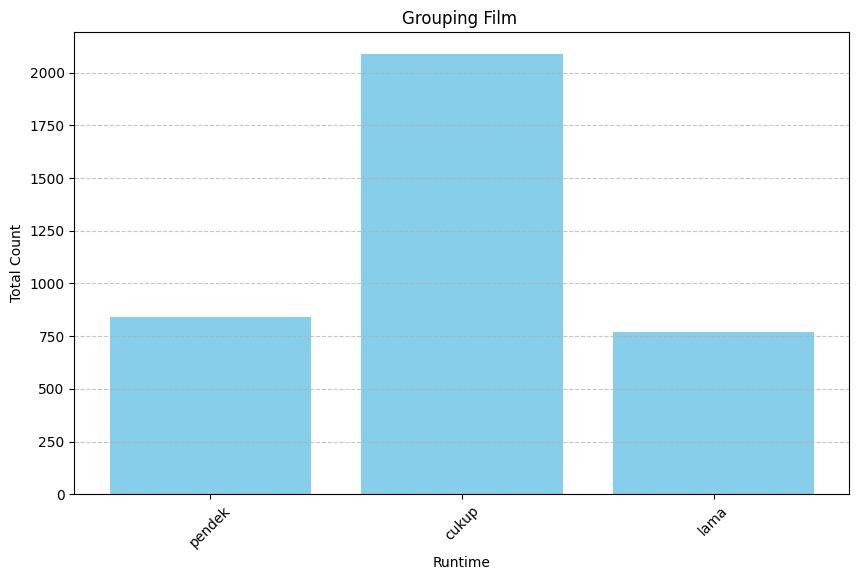

In [ ]:
# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouping_movie['group_runtime'], grouping_movie['count'], color='skyblue')
plt.xlabel('Runtime')
plt.ylabel('Total Count')
plt.title('Grouping Film ')
plt.xticks(rotation=45)  # Memiringkan label sumbu X dengan sudut 45 derajat
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan gridlines horizontal

# Menyimpan plot sebagai file PNG
#plt.savefig('Grouping Film.png')

plt.show()

In [ ]:
movie['Release_Date'] = pd.to_datetime(movie['Release_Date'])
movie['year'] = movie['Release_Date'].dt.year

In [ ]:
yearly_movie = movie.groupby('year').size().reset_index(name='count')
yearly_movie

,year,count
0,1932,1
1,1933,1
2,1939,2
3,1940,1
4,1941,1
...,...,...
77,2019,170
78,2020,198
79,2021,315
80,2022,643


Text(0, 0.5, 'Jumlah')

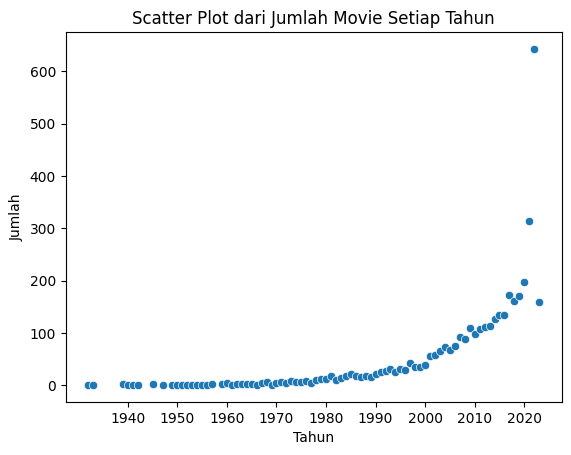

In [ ]:
# Membuat scatter plot
sns.scatterplot(x='year', y='count', data=yearly_movie)

# Menampilkan seluruh tahun pada label X dengan gap 10 tahun
years_for_ticks = yearly_movie[yearly_movie['year'] % 10 == 0]['year']
plt.xticks(years_for_ticks)

# Menambahkan judul dan label
plt.title('Scatter Plot dari Jumlah Movie Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')

# Menyimpan plot sebagai file PNG
#plt.savefig('Scatter Plot dari Jumlah Movie Setiap Tahun.png')

      decade  count
0      <1990    286
1  1990-1999    307
2  2000-2009    728
3  2010-2019   1330
4  2020-2029   1315


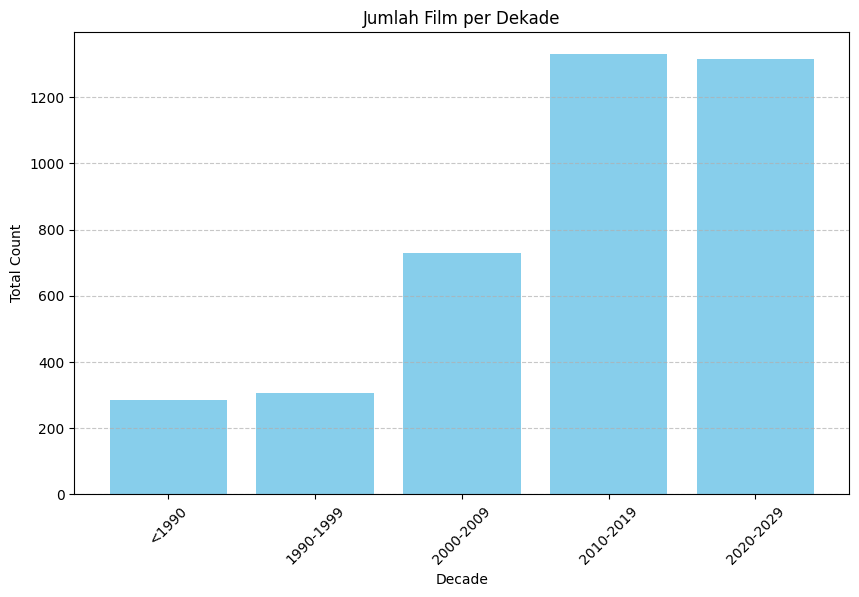

In [ ]:
# Membuat kategori dekade
bins = [0, 1989, 1999, 2009, 2019, 2029]
labels = ['<1990', '1990-1999', '2000-2009', '2010-2019', '2020-2029']
yearly_movie['decade'] = pd.cut(yearly_movie['year'], bins=bins, labels=labels, right=True)

# Mengelompokkan data berdasarkan dekade dan menjumlahkan nilai count
decade_summary = yearly_movie.groupby('decade')['count'].sum().reset_index()

# Menampilkan hasil
print(decade_summary)

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(decade_summary['decade'], decade_summary['count'], color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Total Count')
plt.title('Jumlah Film per Dekade')
plt.xticks(rotation=45)  # Memiringkan label sumbu X dengan sudut 45 derajat
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan gridlines horizontal

# Menyimpan plot sebagai file PNG
#plt.savefig('Jumlah Film per Dekade.png')

plt.show()

# DATA PREPROCESSION

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Movie_Name     3966 non-null   object        
 1   Certification  3697 non-null   object        
 2   Release_Date   3966 non-null   datetime64[ns]
 3   Genres         3966 non-null   object        
 4   Language       3966 non-null   object        
 5   Budget         3966 non-null   object        
 6   Revenue        3966 non-null   object        
 7   Runtime        3702 non-null   float64       
 8   year           3966 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 263.5+ KB


In [ ]:
movie.head()

,Movie_Name,Certification,Release_Date,Genres,Language,Budget,Revenue,Runtime,year
0,Black Panther: Wakanda Forever,PG13,2022-11-10,"['Action,', 'Adventure,', 'Science Fiction']",English,"$250,000,000.00","$835,000,000.00",162.0,2022
1,Puss in Boots: The Last Wish,PG,2022-12-08,"['Animation,', 'Adventure,', 'Comedy,', 'Famil...",English,"$90,000,000.00","$369,105,725.00",103.0,2022
2,Shotgun Wedding,R,2022-12-28,"['Action,', 'Romance,', 'Comedy']",English,-,"$4,495,365.00",101.0,2022
3,M3GAN,PG13,2023-01-05,"['Science Fiction,', 'Horror,', 'Comedy']",English,"$12,000,000.00","$158,000,000.00",102.0,2023
4,Transfusion,MA15+,2023-01-05,"['Crime,', 'Thriller,', 'Drama']",English,-,-,105.0,2023


### Memperbaiki kolom Budget dan Revenue serta menambahkan kolom Profit

In [ ]:
# Menghapus semua karakter yang bukan angka, menyisakan angka saja
movie['Budget'] = movie['Budget'].str.replace(r'[^\d]', '', regex=True)

# Mengonversi kolom ke tipe numerik (opsional, jika Anda ingin angka dalam format numerik)
movie['Budget'] = pd.to_numeric(movie['Budget'], errors='coerce')

In [ ]:
# Menghapus semua karakter yang bukan angka, menyisakan angka saja
movie['Revenue'] = movie['Revenue'].str.replace(r'[^\d]', '', regex=True)

# Mengonversi kolom ke tipe numerik (opsional, jika Anda ingin angka dalam format numerik)
movie['Revenue'] = pd.to_numeric(movie['Revenue'], errors='coerce')

In [ ]:
# Menambah kolom profit
movie['profit'] = movie['Revenue'] - movie['Budget']
movie.head()

,Movie_Name,Certification,Release_Date,Genres,Language,Budget,Revenue,Runtime,year,profit
0,Black Panther: Wakanda Forever,PG13,2022-11-10,"['Action,', 'Adventure,', 'Science Fiction']",English,2.500000e+10,8.350000e+10,162.0,2022,5.850000e+10
1,Puss in Boots: The Last Wish,PG,2022-12-08,"['Animation,', 'Adventure,', 'Comedy,', 'Famil...",English,9.000000e+09,3.691057e+10,103.0,2022,2.791057e+10
2,Shotgun Wedding,R,2022-12-28,"['Action,', 'Romance,', 'Comedy']",English,NaN,4.495365e+08,101.0,2022,NaN
3,M3GAN,PG13,2023-01-05,"['Science Fiction,', 'Horror,', 'Comedy']",English,1.200000e+09,1.580000e+10,102.0,2023,1.460000e+10
4,Transfusion,MA15+,2023-01-05,"['Crime,', 'Thriller,', 'Drama']",English,NaN,NaN,105.0,2023,NaN


### Penghapusan kolom tidak berguna

In [ ]:
movie = movie.drop(columns=['Certification'], axis=1)

## Pengecekan missing dan duplicated data

In [ ]:
# Cek data null
movie.isnull().sum()

Movie_Name         0
Release_Date       0
Genres             0
Language           0
Budget          1889
Revenue         1606
Runtime          264
year               0
profit          2014
dtype: int64

In [ ]:
#Drop data Null
movie.dropna(inplace=True)

In [ ]:
# Cek data duplikat
movie.duplicated().sum()

0

## Normalisasi kolom genre

In [ ]:
movie.head()

,Movie_Name,Release_Date,Genres,Language,Budget,Revenue,Runtime,year,profit
0,Black Panther: Wakanda Forever,2022-11-10,"['Action,', 'Adventure,', 'Science Fiction']",English,2.500000e+10,8.350000e+10,162.0,2022,5.850000e+10
1,Puss in Boots: The Last Wish,2022-12-08,"['Animation,', 'Adventure,', 'Comedy,', 'Famil...",English,9.000000e+09,3.691057e+10,103.0,2022,2.791057e+10
3,M3GAN,2023-01-05,"['Science Fiction,', 'Horror,', 'Comedy']",English,1.200000e+09,1.580000e+10,102.0,2023,1.460000e+10
7,Avatar: The Way of Water,2022-12-15,"['Science Fiction,', 'Adventure,', 'Action']",English,4.600000e+10,2.176000e+11,192.0,2022,1.716000e+11
8,Devotion,2023-01-20,"['War,', 'History,', 'Drama']",English,9.000000e+09,2.000000e+09,139.0,2023,-7.000000e+09


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1930 entries, 0 to 3963
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Movie_Name    1930 non-null   object        
 1   Release_Date  1930 non-null   datetime64[ns]
 2   Genres        1930 non-null   object        
 3   Language      1930 non-null   object        
 4   Budget        1930 non-null   float64       
 5   Revenue       1930 non-null   float64       
 6   Runtime       1930 non-null   float64       
 7   year          1930 non-null   int32         
 8   profit        1930 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(1), object(3)
memory usage: 143.2+ KB


In [ ]:
movie['Genres'].head()

0              [Action, Adventure, Science, Fiction]
1    [Animation, Adventure, Comedy, Family, Fantasy]
3                 [Science, Fiction, Horror, Comedy]
7              [Science, Fiction, Adventure, Action]
8                              [War, History, Drama]
Name: Genres, dtype: object

In [ ]:
# Menghapus tanda kutip, koma tambahan, dan spasi ekstra
movie['Genres'] = movie['Genres'].str.replace(r"[\[\]']", '', regex=True)  # Hapus tanda kurung dan kutip
movie['Genres'] = movie['Genres'].str.replace(r',', '', regex=True)  # Hapus koma
movie['Genres'] = movie['Genres'].str.strip()  # Hapus spasi di awal dan akhir

# Pecah genre menjadi list
movie['Genres'] = movie['Genres'].str.split(' ')

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
# Menggunakan MultiLabelBinarizer untuk preprocessing
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movie['Genres'])

# Membuat DataFrame dengan genre yang telah dienkode
genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

# Menggabungkan dengan DataFrame asli
movie_encoded = pd.concat([movie, genre_encoded_df], axis=1).drop('Genres', axis=1)

In [ ]:
movie_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2903 entries, 0 to 1928
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Movie_Name    1930 non-null   object        
 1   Release_Date  1930 non-null   datetime64[ns]
 2   Language      1930 non-null   object        
 3   Budget        1930 non-null   float64       
 4   Revenue       1930 non-null   float64       
 5   Runtime       1930 non-null   float64       
 6   year          1930 non-null   float64       
 7   profit        1930 non-null   float64       
 8   Action        1930 non-null   float64       
 9   Adventure     1930 non-null   float64       
 10  Animation     1930 non-null   float64       
 11  Comedy        1930 non-null   float64       
 12  Crime         1930 non-null   float64       
 13  Documentary   1930 non-null   float64       
 14  Drama         1930 non-null   float64       
 15  Family        1930 non-null   float64      

# ANALISA

## Jumlah film setiap genre

## All genre

In [ ]:
# all genre
genre_sum = genre_encoded_df.drop(columns=['Movie','TV','Documentary'])
genre_sum = genre_sum.sum().sort_values(ascending=False).reset_index()
genre_sum = genre_sum.rename(columns={'index': 'Genre', 0: 'Amount'})
genre_sum

,Genre,Amount
0,Action,725
1,Comedy,606
2,Adventure,587
3,Drama,575
4,Thriller,560
5,Fantasy,340
6,Science,334
7,Family,334
8,Fiction,334
9,Horror,311


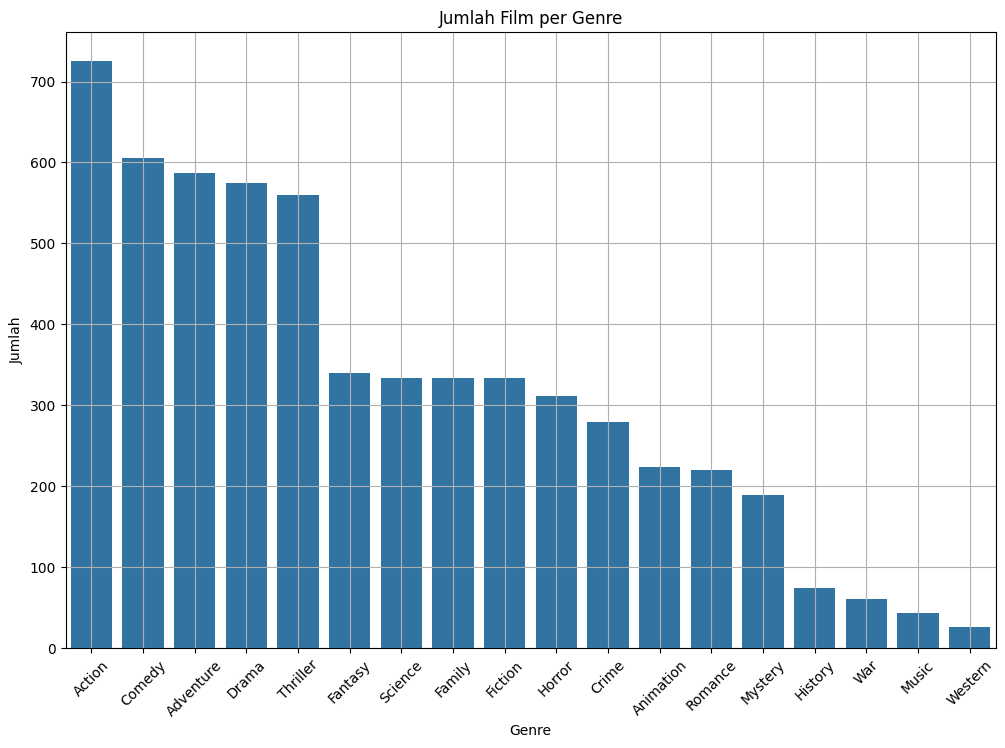

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=genre_sum, x='Genre', y='Amount')

plt.title('Jumlah Film per Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True)

## Genre Utama

In [ ]:
movie['main_genre'] = movie['Genres'].apply(lambda x: x[0] if len(x) > 0 else None)

In [ ]:
main_genre_count = movie['main_genre'].value_counts().reset_index()
main_genre_count = main_genre_count.rename(columns={'count': 'Amount'})
main_genre_count

,main_genre,Amount
0,Action,416
1,Comedy,259
2,Drama,243
3,Horror,219
4,Adventure,200
5,Animation,124
6,Science,81
7,Fantasy,79
8,Crime,73
9,Thriller,69


Text(0, 0.5, 'Jumlah')

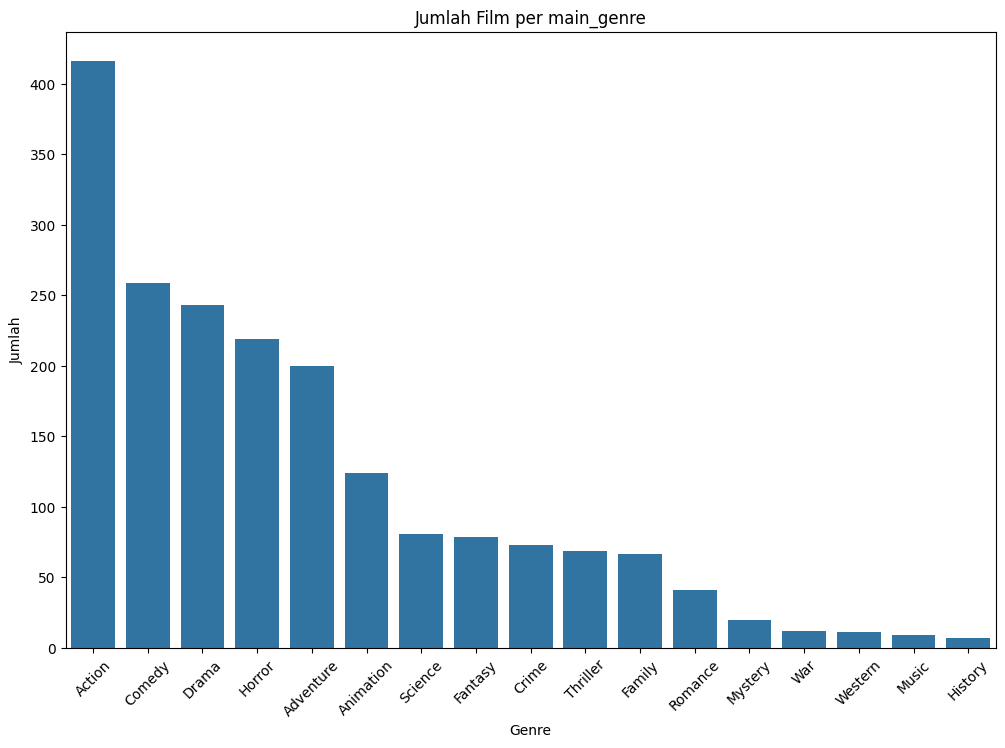

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=main_genre_count, x='main_genre', y='Amount')

plt.title('Jumlah Film per main_genre')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Jumlah')

## TASK 1
Tugas 1: Analisis Keuangan Film

In [ ]:
budget_yearly = movie.groupby('year')['Budget'].sum().reset_index()
revenue_yearly = movie.groupby('year')['Revenue'].sum().reset_index()
budget_yearly.head()

,year,Budget
0,1933,67200000.0
1,1939,677700000.0
2,1940,260000000.0
3,1941,83972700.0
4,1942,85800000.0


### Script

In [ ]:
revenue_yearly

,year,Revenue
0,1933,1.000000e+09
1,1939,4.361075e+10
2,1940,8.430000e+09
3,1941,2.321800e+09
4,1942,2.674472e+10
...,...,...
71,2019,2.449463e+12
72,2020,3.857884e+11
73,2021,1.226815e+12
74,2022,1.549676e+12


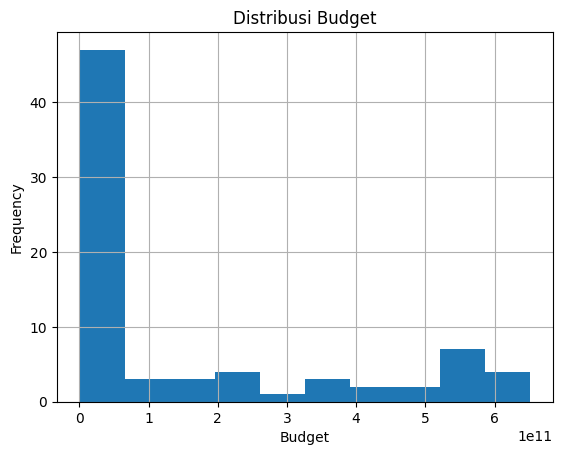

In [ ]:
budget_yearly.hist(column='Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribusi Budget')
# Menyimpan plot sebagai file PNG
#plt.savefig('Distribusi Budget.png')

plt.show()

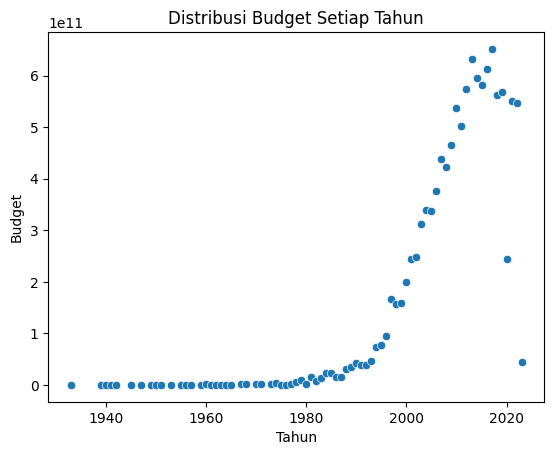

In [ ]:
sns.scatterplot(x='year', y='Budget', data=budget_yearly)
plt.xlabel('Tahun')
plt.ylabel('Budget')
plt.title('Distribusi Budget Setiap Tahun')
# Menyimpan plot sebagai file PNG
#plt.savefig('Distribusi Budget Setiap Tahun.png')

plt.show()

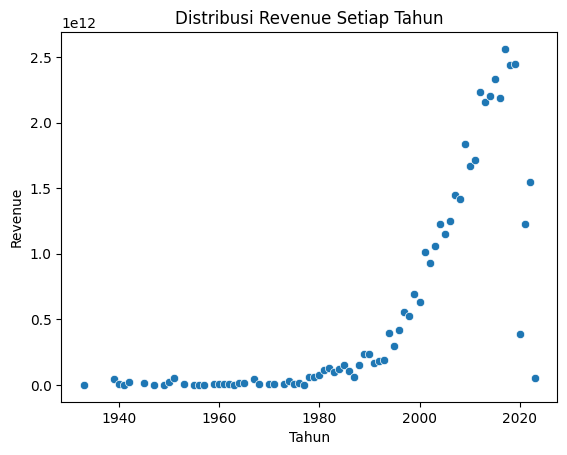

In [ ]:
sns.scatterplot(x='year', y='Revenue', data=revenue_yearly)
plt.xlabel('Tahun')
plt.ylabel('Revenue')
plt.title('Distribusi Revenue Setiap Tahun')
# Menyimpan plot sebagai file PNG
#plt.savefig('Distribusi Revenue Setiap Tahun.png')

plt.show()

### analisa

Dari hasil analisa didapatkan bahwa semakin baru film maka budget yang dikeluarkan akan semakin banyak.

In [ ]:
budget_yearly_describe = movie.groupby('year')['Budget'].describe().reset_index()
budget_yearly_describe

,year,count,mean,std,min,25%,50%,75%,max
0,1933,1.0,6.720000e+07,NaN,67200000.0,6.720000e+07,6.720000e+07,6.720000e+07,6.720000e+07
1,1939,2.0,3.388500e+08,8.647916e+07,277700000.0,3.082750e+08,3.388500e+08,3.694250e+08,4.000000e+08
2,1940,1.0,2.600000e+08,NaN,260000000.0,2.600000e+08,2.600000e+08,2.600000e+08,2.600000e+08
3,1941,1.0,8.397270e+07,NaN,83972700.0,8.397270e+07,8.397270e+07,8.397270e+07,8.397270e+07
4,1942,1.0,8.580000e+07,NaN,85800000.0,8.580000e+07,8.580000e+07,8.580000e+07,8.580000e+07
...,...,...,...,...,...,...,...,...,...
71,2019,75.0,7.566133e+09,7.384420e+09,600000000.0,2.000000e+09,4.800000e+09,1.175000e+10,3.560000e+10
72,2020,46.0,5.300877e+09,6.077254e+09,5600000.0,1.000000e+09,2.500000e+09,7.300000e+09,2.050000e+10
73,2021,74.0,7.432095e+09,6.884280e+09,500000000.0,2.000000e+09,4.400000e+09,1.075000e+10,2.500000e+10
74,2022,82.0,6.661994e+09,7.750943e+09,1500000.0,1.700000e+09,4.000000e+09,8.875000e+09,4.600000e+10


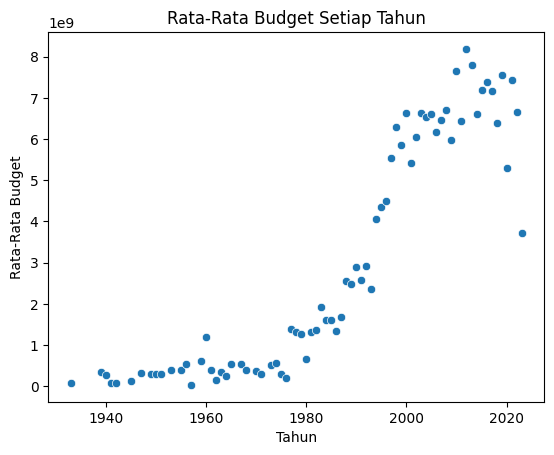

In [ ]:
sns.scatterplot(x='year', y='mean', data=budget_yearly_describe)
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Budget')
plt.title('Rata-Rata Budget Setiap Tahun')
# Menyimpan plot sebagai file PNG
#plt.savefig('Rata-Rata Budget Setiap Tahun.png')

plt.show()

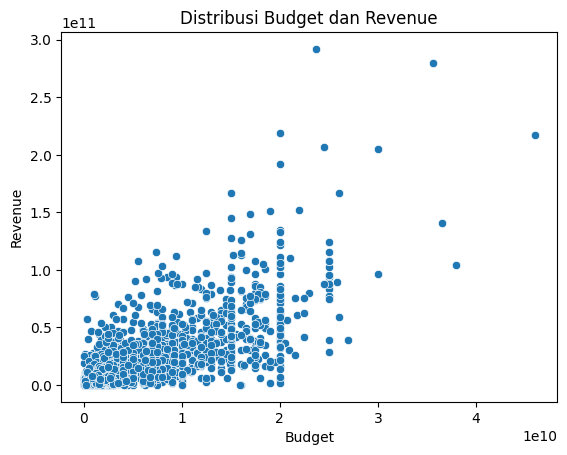

In [ ]:
sns.scatterplot(x='Budget', y='Revenue', data=movie)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Distribusi Budget dan Revenue')
# Menyimpan plot sebagai file PNG
#plt.savefig('Distribusi Budget dan Revenue.png')

plt.show()

## TASK 2
Tugas 2: Analisis Genre dan Profitabilitas

In [ ]:
movie['profit'] = movie['Revenue'] - movie['Budget']
movie.head()

,Movie_Name,Release_Date,Genres,Language,Budget,Revenue,Runtime,year,profit
0,Black Panther: Wakanda Forever,2022-11-10,"[Action, Adventure, Science, Fiction]",English,2.500000e+10,8.350000e+10,162.0,2022,5.850000e+10
1,Puss in Boots: The Last Wish,2022-12-08,"[Animation, Adventure, Comedy, Family, Fantasy]",English,9.000000e+09,3.691057e+10,103.0,2022,2.791057e+10
3,M3GAN,2023-01-05,"[Science, Fiction, Horror, Comedy]",English,1.200000e+09,1.580000e+10,102.0,2023,1.460000e+10
7,Avatar: The Way of Water,2022-12-15,"[Science, Fiction, Adventure, Action]",English,4.600000e+10,2.176000e+11,192.0,2022,1.716000e+11
8,Devotion,2023-01-20,"[War, History, Drama]",English,9.000000e+09,2.000000e+09,139.0,2023,-7.000000e+09


In [ ]:
movie['Genres']

0                 [Action, Adventure, Science, Fiction]
1       [Animation, Adventure, Comedy, Family, Fantasy]
3                    [Science, Fiction, Horror, Comedy]
7                 [Science, Fiction, Adventure, Action]
8                                 [War, History, Drama]
                             ...                       
3955                                   [Drama, Romance]
3957                                     [Drama, Crime]
3960                       [Adventure, Comedy, Romance]
3961                 [Comedy, Action, Science, Fiction]
3963                   [Action, Crime, Thriller, Drama]
Name: Genres, Length: 1930, dtype: object

In [ ]:
movie_encoded = pd.concat([movie, genre_encoded_df], axis=1).drop('Genres', axis=1)
movie_encoded.head()

,Movie_Name,Release_Date,Language,Budget,Revenue,Runtime,year,profit,Action,Adventure,...,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,Black Panther: Wakanda Forever,2022-11-10,English,2.500000e+10,8.350000e+10,162.0,2022.0,5.850000e+10,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Puss in Boots: The Last Wish,2022-12-08,English,9.000000e+09,3.691057e+10,103.0,2022.0,2.791057e+10,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M3GAN,2023-01-05,English,1.200000e+09,1.580000e+10,102.0,2023.0,1.460000e+10,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,Avatar: The Way of Water,2022-12-15,English,4.600000e+10,2.176000e+11,192.0,2022.0,1.716000e+11,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Devotion,2023-01-20,English,9.000000e+09,2.000000e+09,139.0,2023.0,-7.000000e+09,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
movie_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2903 entries, 0 to 1928
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Movie_Name    1930 non-null   object        
 1   Release_Date  1930 non-null   datetime64[ns]
 2   Language      1930 non-null   object        
 3   Budget        1930 non-null   float64       
 4   Revenue       1930 non-null   float64       
 5   Runtime       1930 non-null   float64       
 6   year          1930 non-null   float64       
 7   profit        1930 non-null   float64       
 8   Action        1930 non-null   float64       
 9   Adventure     1930 non-null   float64       
 10  Animation     1930 non-null   float64       
 11  Comedy        1930 non-null   float64       
 12  Crime         1930 non-null   float64       
 13  Documentary   1930 non-null   float64       
 14  Drama         1930 non-null   float64       
 15  Family        1930 non-null   float64      

In [ ]:
# Menggabungkan profit dengan genre
genre_profit_df = movie_encoded.melt(id_vars=['profit', 'Budget','Revenue'], value_vars=mlb.classes_, var_name='Genre', value_name='Is_Genre')
# Filter rows where Is_Genre is 1
genre_profit_df = genre_profit_df[genre_profit_df['Is_Genre'] == 1]


In [ ]:
genre_profit_df

,profit,Budget,Revenue,Genre,Is_Genre
0,5.850000e+10,2.500000e+10,8.350000e+10,Action,1.0
2,1.460000e+10,1.200000e+09,1.580000e+10,Action,1.0
3,1.716000e+11,4.600000e+10,2.176000e+11,Action,1.0
8,-3.588904e+09,7.800000e+09,4.211096e+09,Action,1.0
9,4.000000e+08,2.500000e+09,2.900000e+09,Action,1.0
...,...,...,...,...,...
60708,NaN,NaN,NaN,Western,1.0
60775,NaN,NaN,NaN,Western,1.0
60794,NaN,NaN,NaN,Western,1.0
60878,NaN,NaN,NaN,Western,1.0


In [ ]:
avg_genre_profit = genre_profit_df.groupby('Genre')['profit'].mean().reset_index()
avg_genre_profit = avg_genre_profit.dropna()
avg_genre_profit = avg_genre_profit[~avg_genre_profit['Genre'].apply(lambda x: 'TV' in x or 'Movie' in x)]
avg_genre_profit

,Genre,profit
0,Action,2.472947e+10
1,Adventure,2.296934e+10
2,Animation,2.810088e+10
3,Comedy,2.351975e+10
4,Crime,2.661650e+10
6,Drama,2.317615e+10
7,Family,2.376737e+10
8,Fantasy,2.432209e+10
9,Fiction,2.716523e+10
10,History,2.364971e+10


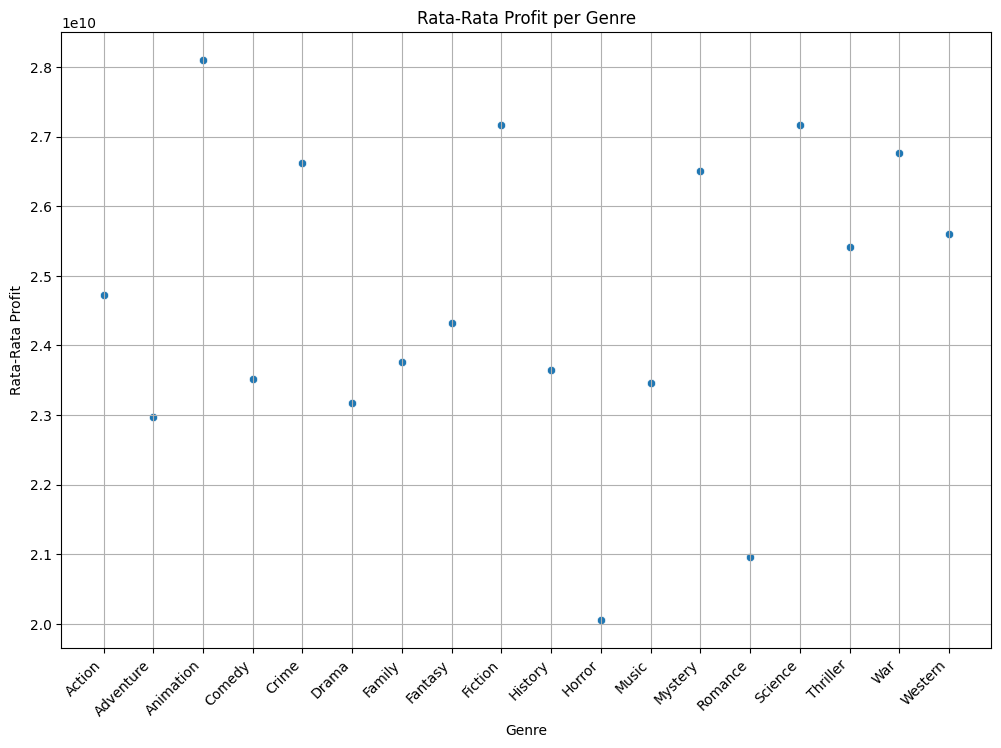

In [ ]:
plt.figure(figsize=(12, 8))  # Mengatur lebar dan tinggi plot
sns.scatterplot(data=avg_genre_profit, x='Genre', y='profit')

plt.title('Rata-Rata Profit per Genre')
plt.xlabel('Genre')
plt.ylabel('Rata-Rata Profit')

# Memiringkan label sumbu x
plt.xticks(rotation=45, ha='right')

# Menyimpan plot sebagai file PNG
#plt.savefig('Rata-Rata Profit per Genre.png')

# Menampilkan plot
plt.grid(True)
plt.show()

In [ ]:
avg_genre_Budget = genre_profit_df.groupby('Genre')['Budget'].mean().reset_index()
avg_genre_Budget = avg_genre_Budget.dropna()
avg_genre_Budget = avg_genre_Budget[~avg_genre_Budget['Genre'].apply(lambda x: 'TV' in x or 'Movie' in x)]
avg_genre_Budget

,Genre,Budget
0,Action,8.228409e+09
1,Adventure,7.573091e+09
2,Animation,8.609906e+09
3,Comedy,7.470885e+09
4,Crime,8.225224e+09
6,Drama,7.655158e+09
7,Family,8.049866e+09
8,Fantasy,8.101185e+09
9,Fiction,8.856013e+09
10,History,7.005359e+09


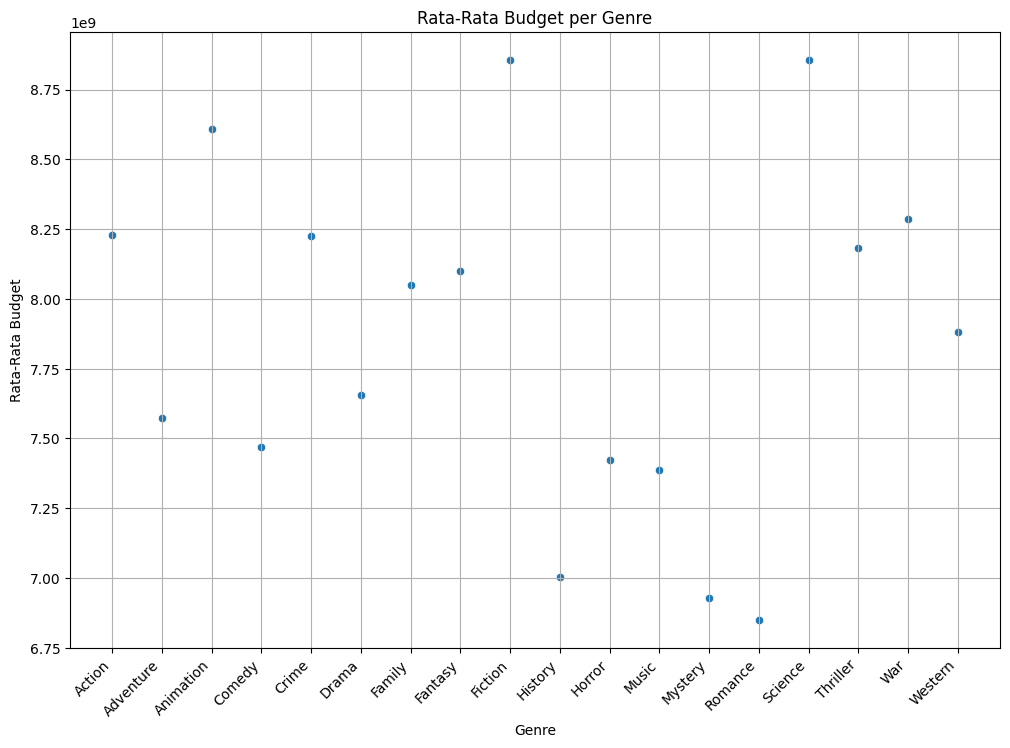

In [ ]:
plt.figure(figsize=(12, 8))  # Mengatur lebar dan tinggi plot
sns.scatterplot(data=avg_genre_Budget, x='Genre', y='Budget')

plt.title('Rata-Rata Budget per Genre')
plt.xlabel('Genre')
plt.ylabel('Rata-Rata Budget')

# Memiringkan label sumbu x
plt.xticks(rotation=45, ha='right')

# Menyimpan plot sebagai file PNG
#plt.savefig('Rata-Rata Budget per Genre.png')

# Menampilkan plot
plt.grid(True)
plt.show()

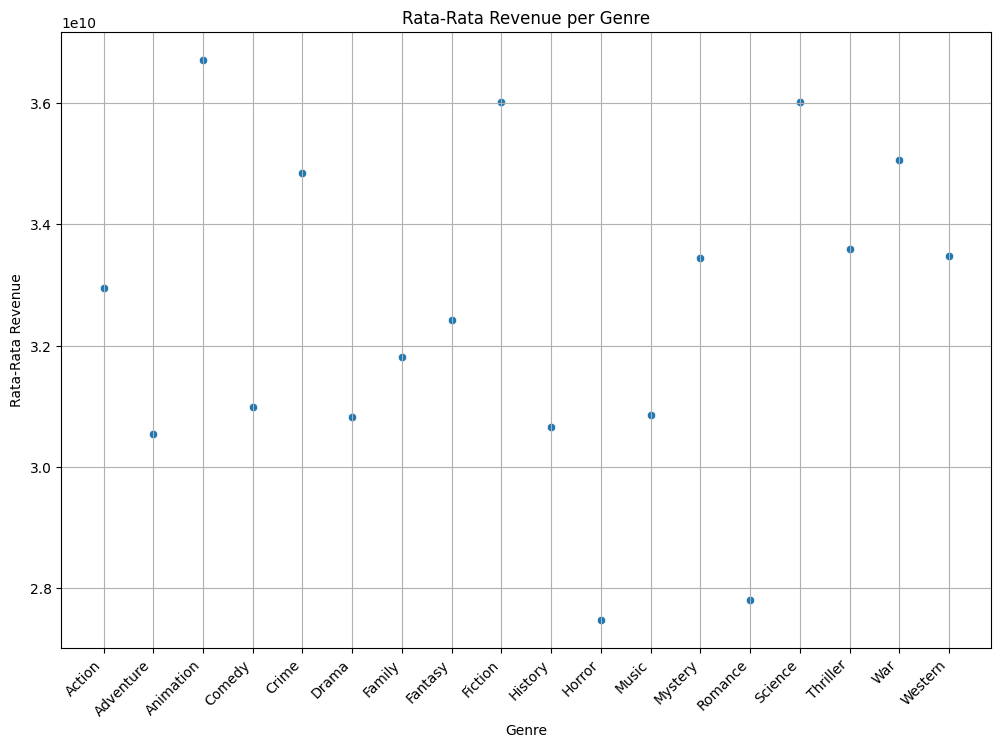

In [ ]:
avg_genre_Revenue = genre_profit_df.groupby('Genre')['Revenue'].mean().reset_index()
avg_genre_Revenue = avg_genre_Revenue.dropna()
avg_genre_Revenue = avg_genre_Revenue[~avg_genre_Revenue['Genre'].apply(lambda x: 'TV' in x or 'Movie' in x)]\

plt.figure(figsize=(12, 8))  # Mengatur lebar dan tinggi plot
sns.scatterplot(data=avg_genre_Revenue, x='Genre', y='Revenue')

plt.title('Rata-Rata Revenue per Genre')
plt.xlabel('Genre')
plt.ylabel('Rata-Rata Revenue')

# Memiringkan label sumbu x
plt.xticks(rotation=45, ha='right')

# Menyimpan plot sebagai file PNG
#plt.savefig('Rata-Rata Revenue per Genre.png')

# Menampilkan plot
plt.grid(True)
plt.show()

## Task 3

In [ ]:
genre_count = genre_encoded_df.sum().sort_values(ascending=False)
genre_count = genre_count.drop(['Movie','TV','Documentary'])
genre_count

Action       725
Comedy       606
Adventure    587
Drama        575
Thriller     560
Fantasy      340
Family       334
Fiction      334
Science      334
Horror       311
Crime        279
Animation    224
Romance      220
Mystery      189
History       74
War           60
Music         43
Western       26
dtype: int64

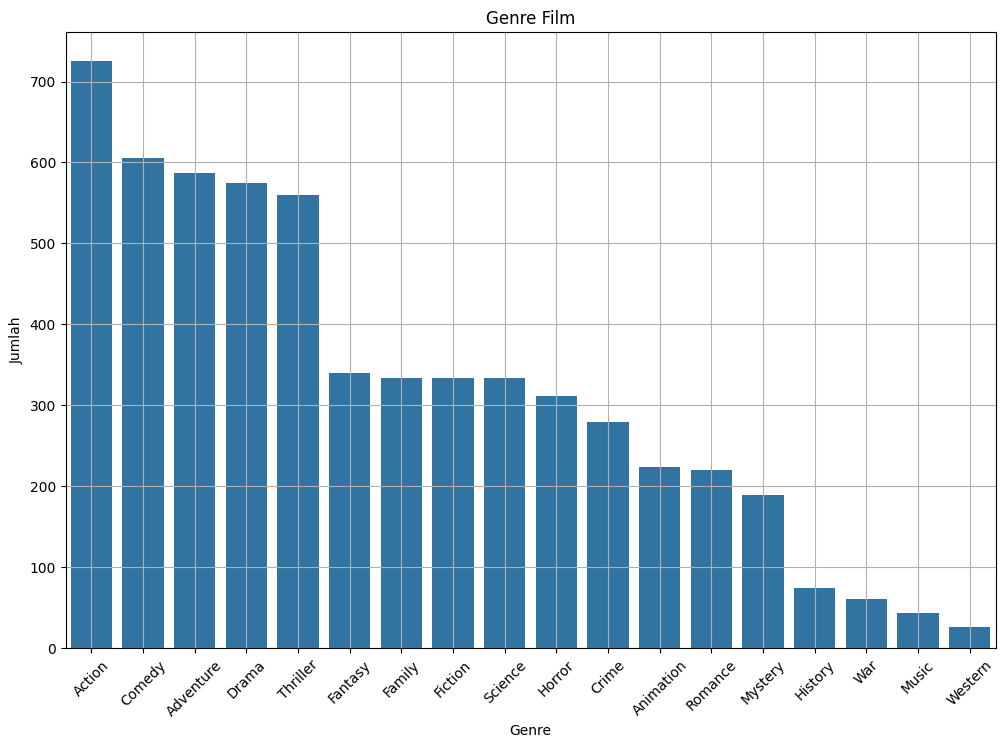

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(genre_count)
plt.title('Genre Film')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True)

# Menyimpan plot sebagai file PNG
#plt.savefig('Genre Film.png')

plt.show()

# Model Machine Learning

### PERSIAPAN DATA

In [ ]:
movie_encoded.columns

Index(['Movie_Name', 'Release_Date', 'Language', 'Budget', 'Revenue',
       'Runtime', 'year', 'profit', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Fiction', 'History', 'Horror', 'Movie', 'Music', 'Mystery', 'Romance',
       'Science', 'TV', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
movie_drop = movie_encoded.dropna()
X = movie_drop.drop(['Revenue'], axis=1)
X = X.select_dtypes(include=['int64', 'float64'])
y = movie_drop['Revenue']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 0 to 1929
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Budget       957 non-null    float64
 1   Runtime      957 non-null    float64
 2   year         957 non-null    float64
 3   profit       957 non-null    float64
 4   Action       957 non-null    float64
 5   Adventure    957 non-null    float64
 6   Animation    957 non-null    float64
 7   Comedy       957 non-null    float64
 8   Crime        957 non-null    float64
 9   Documentary  957 non-null    float64
 10  Drama        957 non-null    float64
 11  Family       957 non-null    float64
 12  Fantasy      957 non-null    float64
 13  Fiction      957 non-null    float64
 14  History      957 non-null    float64
 15  Horror       957 non-null    float64
 16  Movie        957 non-null    float64
 17  Music        957 non-null    float64
 18  Mystery      957 non-null    float64
 19  Romance     

### LINIEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Mengevaluasi model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Absolute Error: 8.404094842262566e-06
R-squared: 1.0


In [ ]:
# Contoh data film baru
new_data = pd.DataFrame({
    'Budget': [700000],
    'Runtime': [125],
    'year': [2023],
    'profit': [2023],
    'Action': [1],
    'Adventure': [1],
    'Animation': [0],
    'Comedy': [0],
    'Crime': [0],
    'Documentary': [0],
    'Drama': [0],
    'Family': [0],
    'Fantasy': [0],
    'Fiction': [0],
    'History': [0],
    'Horror': [0],
    'Movie': [0],
    'Music': [0],
    'Mystery': [0],
    'Romance': [0],
    'Science': [0],
    'TV': [0],
    'Thriller': [0],
    'War': [0],
    'Western': [0],
})

# Prediksi revenue
predicted_revenue = model.predict(new_data)
print(f'Predicted Revenue LinearRegression: {predicted_revenue[0]}')


Predicted Revenue LinearRegression: 702023.0000077955


### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Membuat dan melatih model Random Forest Regressor
model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
model_rfr.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model_rfr.predict(X_test)

# Mengevaluasi model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 914245551.546875
R-squared: 0.9973911953222881


In [ ]:
# Contoh data film baru
new_data = pd.DataFrame({
    'Budget': [700000],
    'Runtime': [125],
    'year': [2023],
    'profit': [2023],
    'Action': [1],
    'Adventure': [1],
    'Animation': [0],
    'Comedy': [0],
    'Crime': [0],
    'Documentary': [0],
    'Drama': [0],
    'Family': [0],
    'Fantasy': [0],
    'Fiction': [0],
    'History': [0],
    'Horror': [0],
    'Movie': [0],
    'Music': [0],
    'Mystery': [0],
    'Romance': [0],
    'Science': [0],
    'TV': [0],
    'Thriller': [0],
    'War': [0],
    'Western': [0],
})

# Prediksi revenue
predicted_revenue = model_rfr.predict(new_data)
print(f'Predicted Revenue menggunakan model RandomForestRegressor: {predicted_revenue[0]}')


Predicted Revenue menggunakan model RandomForestRegressor: 472179830.0


### GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Membuat dan melatih model Random Forest Regressor
model_gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gbr.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model_gbr.predict(X_test)

# Mengevaluasi model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 919996635.5936189
R-squared: 0.9978171288498326


In [ ]:
# Contoh data film baru
new_data = pd.DataFrame({
    'Budget': [700000],
    'Runtime': [125],
    'year': [2023],
    'profit': [2023],
    'Action': [1],
    'Adventure': [1],
    'Animation': [0],
    'Comedy': [0],
    'Crime': [0],
    'Documentary': [0],
    'Drama': [0],
    'Family': [0],
    'Fantasy': [0],
    'Fiction': [0],
    'History': [0],
    'Horror': [0],
    'Movie': [0],
    'Music': [0],
    'Mystery': [0],
    'Romance': [0],
    'Science': [0],
    'TV': [0],
    'Thriller': [0],
    'War': [0],
    'Western': [0],
})

# Prediksi revenue
predicted_revenue = model_gbr.predict(new_data)
print(f'Predicted Revenue menggunakan model GradientBoostingRegressor: {predicted_revenue[0]}')


Predicted Revenue menggunakan model GradientBoostingRegressor: 324947918.2910786


# Export Data

In [ ]:
# Mengekspor ke CSV
# movie.to_csv('data_output_movie.csv', index=False)
# movie_drop.to_csv('data_output_movie_drop.csv', index=False)